# Lando Norris
<img src="https://www.formula1.com/content/fom-website/en/drivers/lando-norris/_jcr_content/image.img.1920.medium.jpg/1646819013197.jpg" width="300">

### Team: McLaren

<img src ="https://www.formula1.com/content/fom-website/en/drivers/lando-norris/_jcr_content/helmet.img.png/1646824749193.png" width="200">


In [1]:
library (tidyverse)
library (tidymodels)
source("source/master_functions.r")
source("source/regression.r")
source("source/prediction.r")
set.seed(620)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [2]:
initialize_master()

Parsed with column specification:
cols(
  circuitId = col_double(),
  circuitRef = col_character(),
  name = col_character(),
  location = col_character(),
  country = col_character(),
  lat = col_double(),
  lng = col_double(),
  alt = col_character(),
  url = col_character()
)

Parsed with column specification:
cols(
  constructorStandingsId = col_double(),
  raceId = col_double(),
  constructorId = col_double(),
  points = col_double(),
  position = col_double(),
  positionText = col_character(),
  wins = col_double()
)

Parsed with column specification:
cols(
  constructorResultsId = col_double(),
  raceId = col_double(),
  constructorId = col_double(),
  points = col_double(),
  status = col_character()
)

Parsed with column specification:
cols(
  constructorId = col_double(),
  constructorRef = col_character(),
  name = col_character(),
  nationality = col_character(),
  url = col_character()
)

Parsed with column specification:
cols(
  driverId = col_double(),
  driverRef = col_

In [3]:
# Filtering Lap Data For 2022 Drivers

lap_data <- lap_times %>%
            filter(driverId %in% driver_ids) %>%
            filter(raceId %in% race_ids)

# Filtering Lap Data For Individual Driver

nor_laps <- lap_data %>%
            filter(driverId == 846)

# Filtering Lap Data for MCLAREN
mcl_lap <- lap_data %>%
             filter(driverId %in% c(838))

# Season Analysis

In [4]:
rmse_col <- data.frame(.metric = character(), .estimator = character(), .estimate = double(), Round = double(), stringsAsFactors=FALSE) 

racetime_col <- data.frame(race_time_milliseconds = double(), race_time_mins = double(), race_time_hrs = double()) 

rmse_col

racetime_col

.metric,.estimator,.estimate,Round
<chr>,<chr>,<dbl>,<dbl>


race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>


`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1011,57
1045,57
1052,56


`geom_smooth()` using formula 'y ~ x'



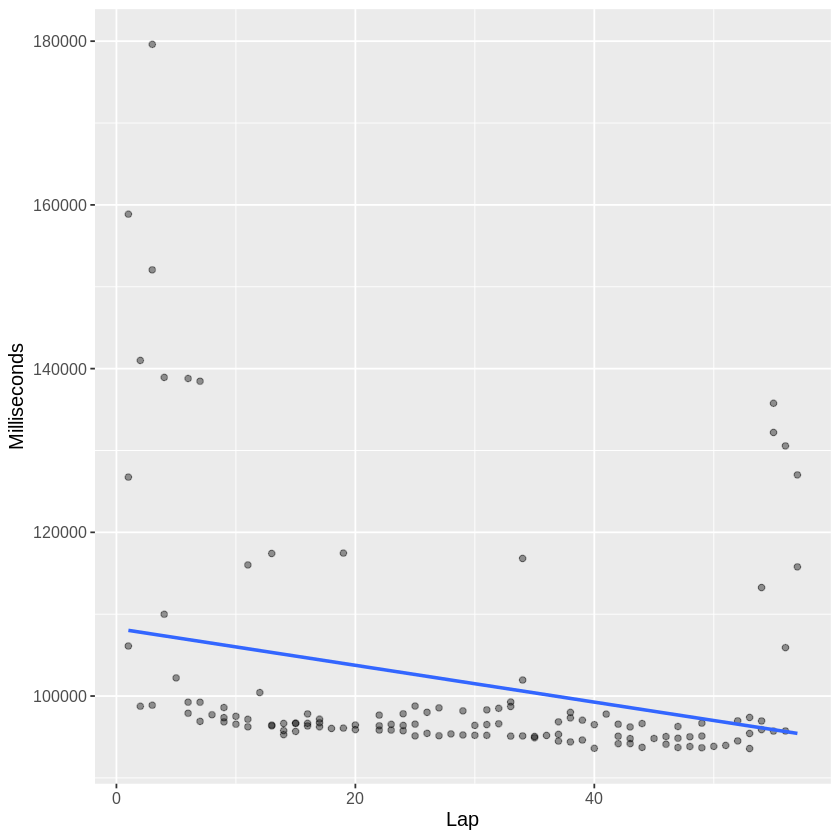

In [5]:
#1. Bahrain

ln_bahrain <- nor_laps %>%
                filter(raceId %in% bahrain_race_ID) 

ln_bahrain_clean <- ln_bahrain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))
ln_bahrain_clean
ln_bahrain_clean_ID <- ln_bahrain_clean %>%
                        pull(raceId)


### SPLITTING DATA

ln_bahrain_races <- nor_laps %>%
                    filter(raceId %in% ln_bahrain_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(ln_bahrain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 1

initiate_rmse() 

### GETS PREDICTION

get_bahrain_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1054,66
1042,65


`geom_smooth()` using formula 'y ~ x'



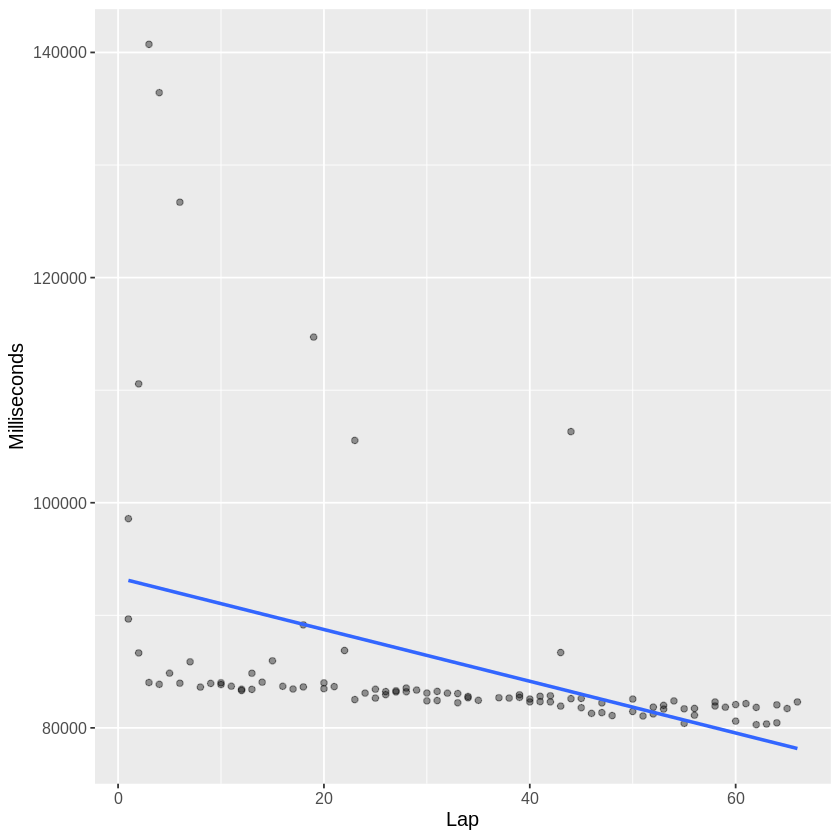

In [6]:
#2. Portimão

ln_Portimão <- nor_laps %>%
                filter(raceId %in% Portimão_race_ID) 

ln_Portimão_clean <- ln_Portimão %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ln_Portimão_clean
ln_Portimão_clean_ID <- ln_Portimão_clean %>%
                        pull(raceId)


### SPLITTING DATA

ln_Portimão_races <- nor_laps %>%
                    filter(raceId %in% ln_Portimão_clean_ID) 

formulaone_split <- initial_split(ln_Portimão_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 2

initiate_rmse() 

### GETS PREDICTION

get_Portimão_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1010,57


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



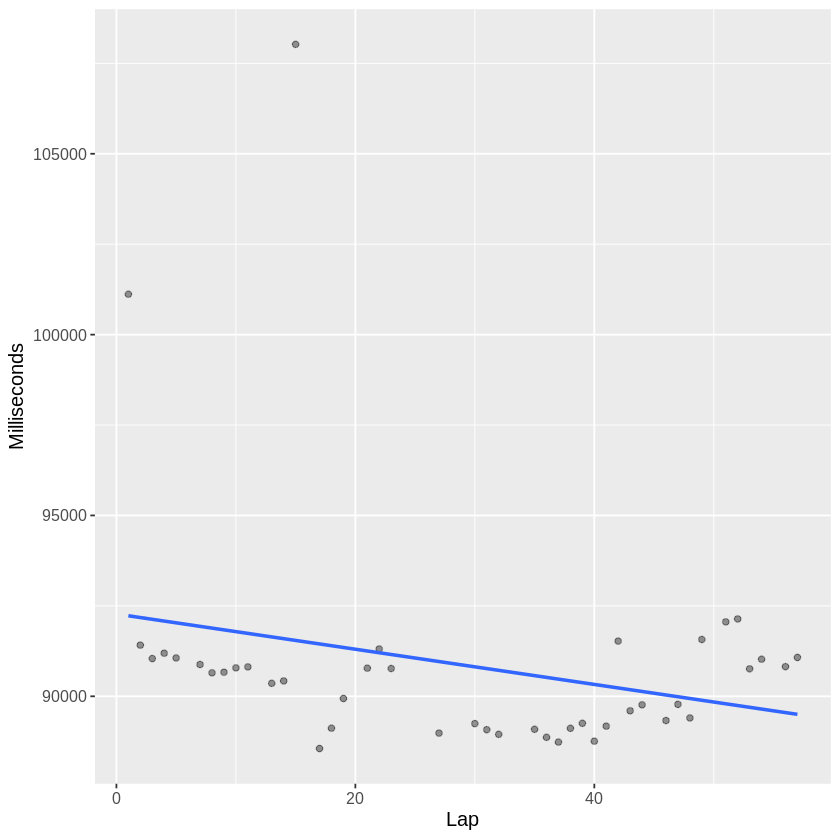

In [7]:
#3.  Australia

ln_aus <- nor_laps %>%
                filter(raceId %in% aus_race_ID) 

ln_aus_clean <- ln_aus %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ln_aus_clean
ln_aus_clean_ID <- ln_aus_clean %>%
                        pull(raceId)


### SPLITTING DATA

ln_aus_races <- nor_laps %>%
                    filter(raceId %in% ln_aus_clean_ID)

formulaone_split <- initial_split(ln_aus_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 3

initiate_rmse() 

### GETS PREDICTION

get_australia_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1043,63
1053,63


`geom_smooth()` using formula 'y ~ x'



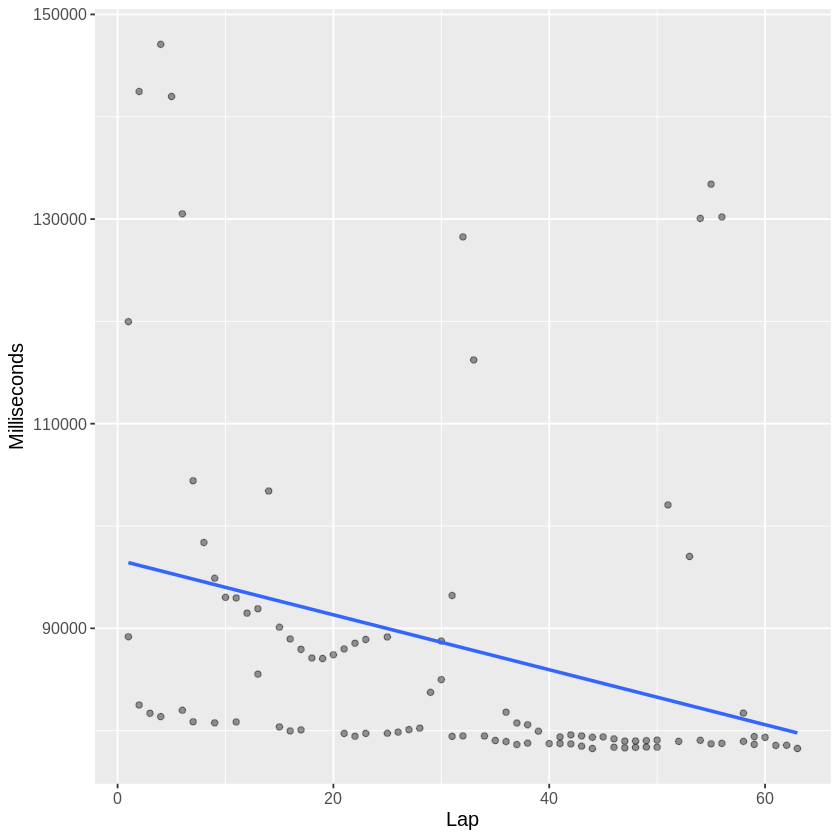

In [8]:
#4.  Italy, Imola

ln_imola <- nor_laps %>%
                filter(raceId %in% imola_race_ID) 

ln_imola_clean <- ln_imola %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ln_imola_clean
ln_imola_clean_ID <- ln_imola_clean %>%
                        pull(raceId)


### SPLITTING DATA

ln_imola_races <- nor_laps %>%
                    filter(raceId %in% ln_imola_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(ln_imola_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 4

initiate_rmse() 

### GETS PREDICTION

get_imola_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1044,58
1067,58


`geom_smooth()` using formula 'y ~ x'



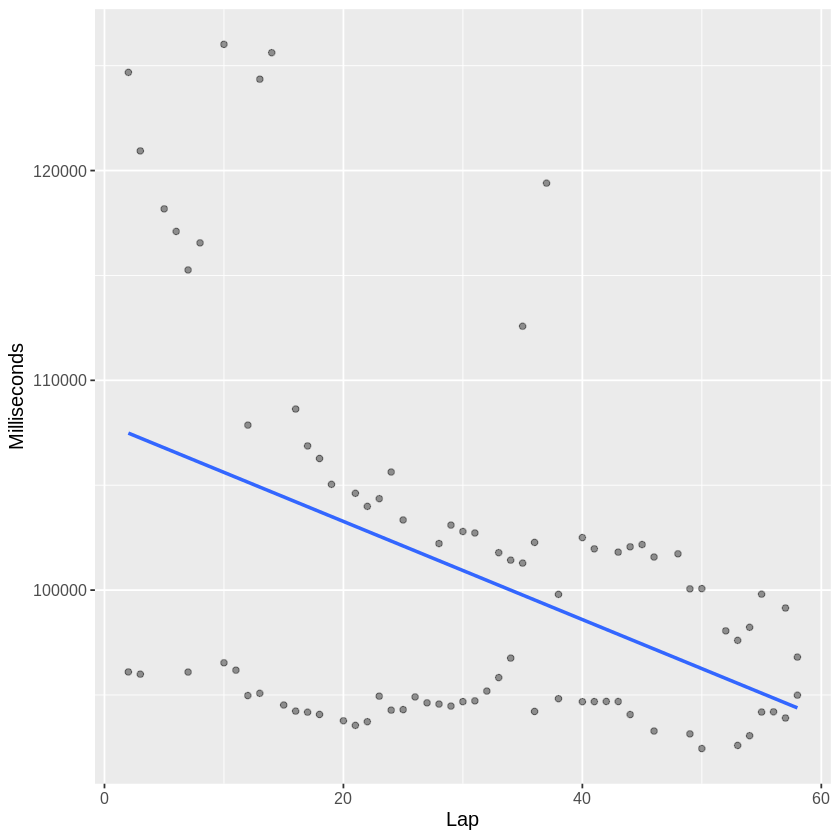

In [9]:
#5.  Turkey (Replacing Miami)

ln_turkey <- nor_laps %>%
                filter(raceId %in% turkey_race_ID) 

ln_turkey_clean <- ln_turkey %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ln_turkey_clean
ln_turkey_clean_ID <- ln_turkey_clean %>%
                        pull(raceId)


### SPLITTING DATA

ln_turkey_races <- nor_laps %>%
                    filter(raceId %in% ln_turkey_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(ln_turkey_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 5

initiate_rmse() 

### GETS PREDICTION

get_miami_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1036,65
1055,65
1014,44


`geom_smooth()` using formula 'y ~ x'



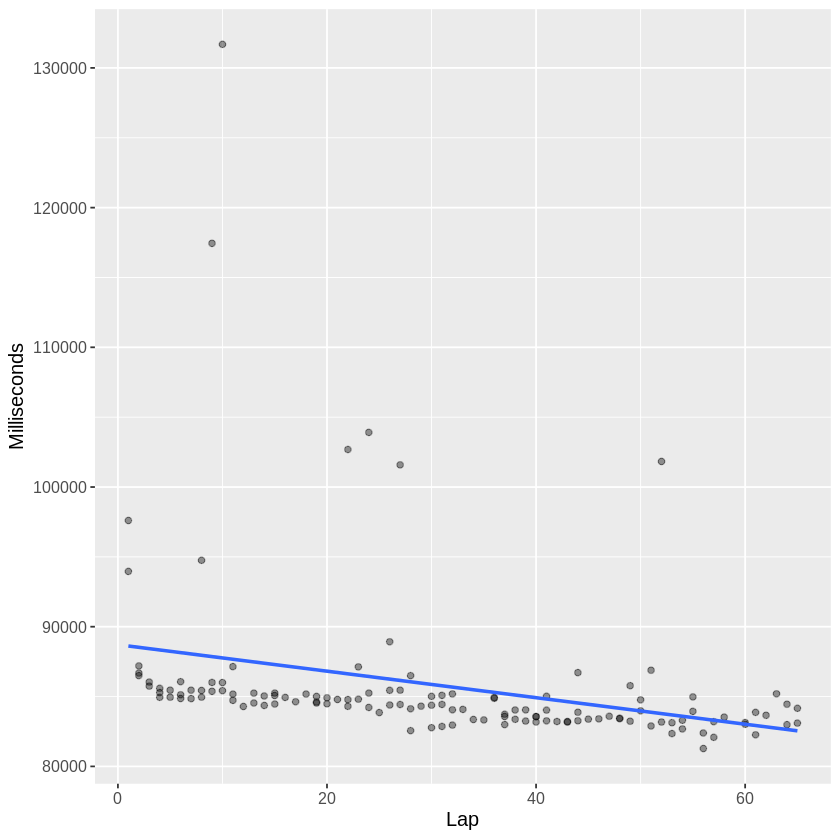

In [10]:
#6.  Spain

ln_spain <- nor_laps %>%
                filter(raceId %in% spain_race_ID) 

ln_spain_clean <- ln_spain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ln_spain_clean
ln_spain_clean_ID <- ln_spain_clean %>%
                        pull(raceId)


### SPLITTING DATA

ln_spain_races <- nor_laps %>%
                    filter(raceId %in% ln_spain_clean_ID)

formulaone_split <- initial_split(ln_spain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 6

initiate_rmse() 

### GETS PREDICTION

get_spain_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1015,78
1056,78


`geom_smooth()` using formula 'y ~ x'



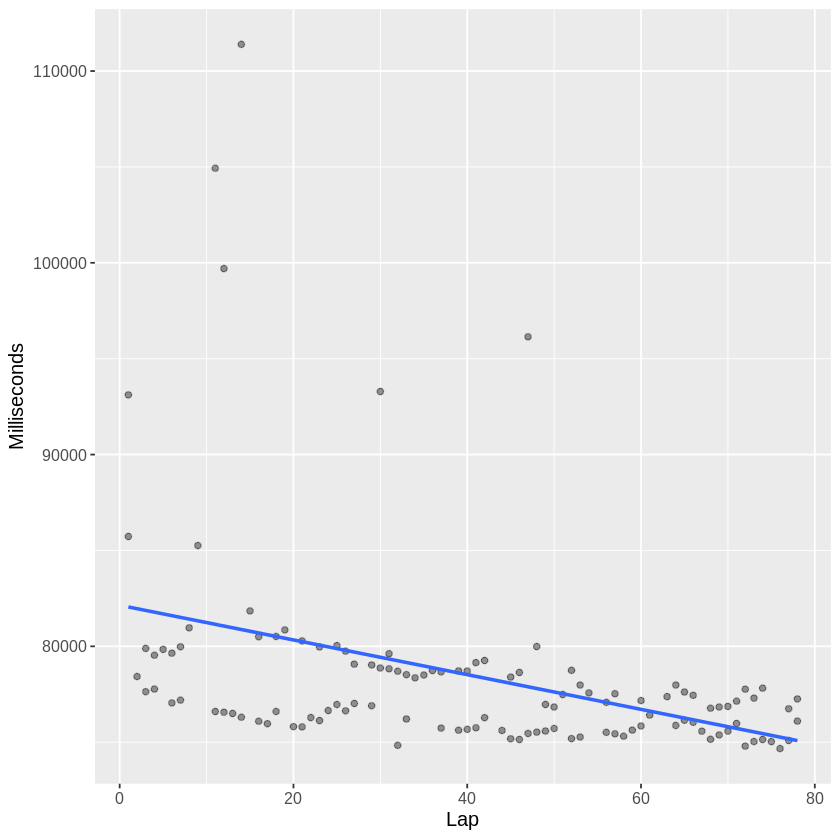

In [11]:
#7.   Monaco

ln_monaco <- nor_laps %>%
                filter(raceId %in% monaco_race_ID) 

ln_monaco_clean <- ln_monaco %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ln_monaco_clean
ln_monaco_clean_ID <- ln_monaco_clean %>%
                        pull(raceId)


### SPLITTING DATA

ln_monaco_races <- nor_laps %>%
                    filter(raceId %in% ln_monaco_clean_ID)

formulaone_split <- initial_split(ln_monaco_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 7

initiate_rmse() 

### GETS PREDICTION

get_monaco_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1013,51
1057,51


`geom_smooth()` using formula 'y ~ x'



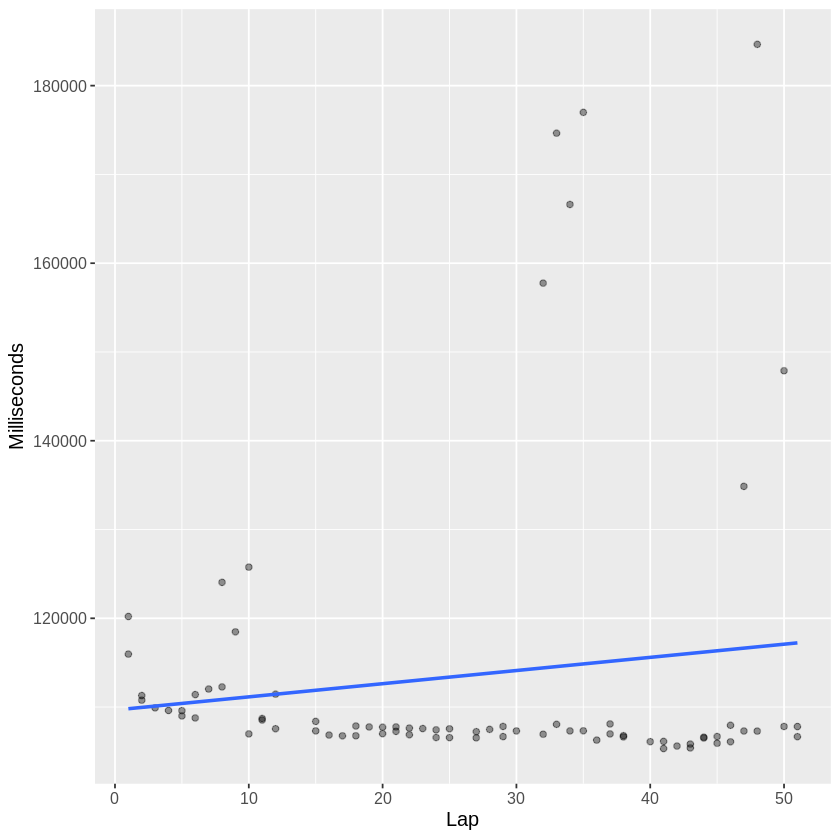

In [12]:
#8.  Azerbaijan

ln_azerbaijan <- nor_laps %>%
                filter(raceId %in% azerbaijan_race_ID) 

ln_azerbaijan_clean <- ln_azerbaijan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ln_azerbaijan_clean
ln_azerbaijan_clean_ID <- ln_azerbaijan_clean %>%
                        pull(raceId)


### SPLITTING DATA

ln_azerbaijan_races <- nor_laps %>%
                    filter(raceId %in% ln_azerbaijan_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(ln_azerbaijan_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 8

initiate_rmse() 

### GETS PREDICTION

get_azerbaijan_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
975,69
995,66


`geom_smooth()` using formula 'y ~ x'



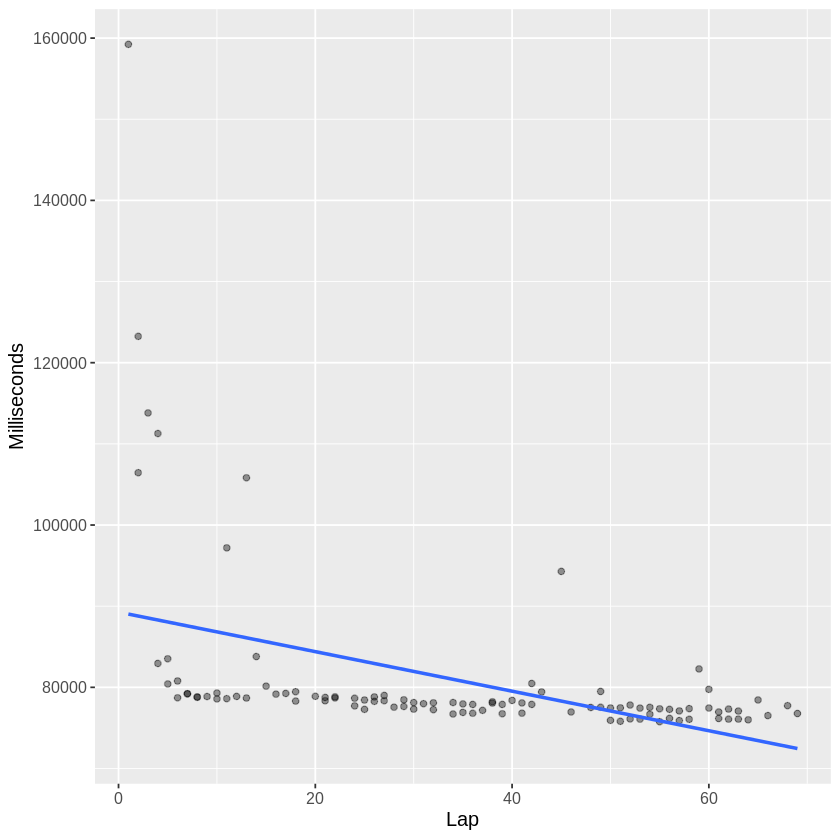

In [13]:
#9.  Canada

ln_canada <- mcl_lap %>%
                filter(raceId %in% canada_race_ID) 

ln_canada_clean <- ln_canada %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ln_canada_clean
ln_canada_clean_ID <- ln_canada_clean %>%
                        pull(raceId)


### SPLITTING DATA

ln_canada_races <- mcl_lap %>%
                    filter(raceId %in% ln_canada_clean_ID)

formulaone_split <- initial_split(ln_canada_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 9

initiate_rmse() 

### GETS PREDICTION

get_canada_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



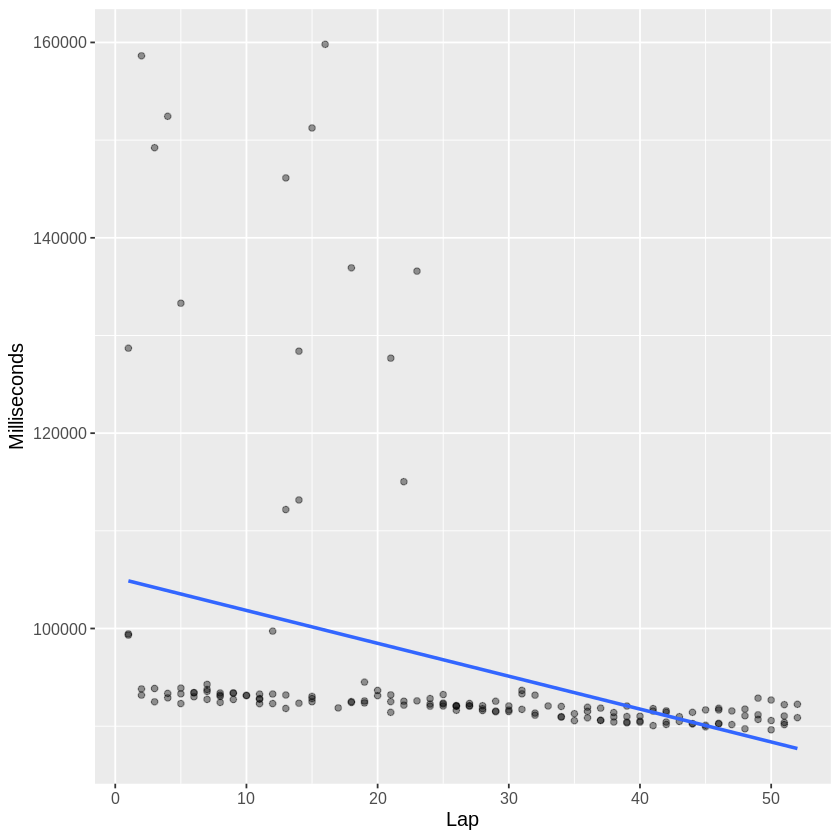

In [14]:
#10.  Great Britain

ln_uk <- nor_laps %>%
                filter(raceId %in% uk_race_ID) 

ln_uk_clean <- ln_uk %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

ln_uk_clean_ID <- ln_uk_clean %>%
                        pull(raceId)


### SPLITTING DATA

ln_uk_races <- nor_laps %>%
                    filter(raceId %in% ln_uk_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(ln_uk_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 10

initiate_rmse() 

### GETS PREDICTION

get_uk_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



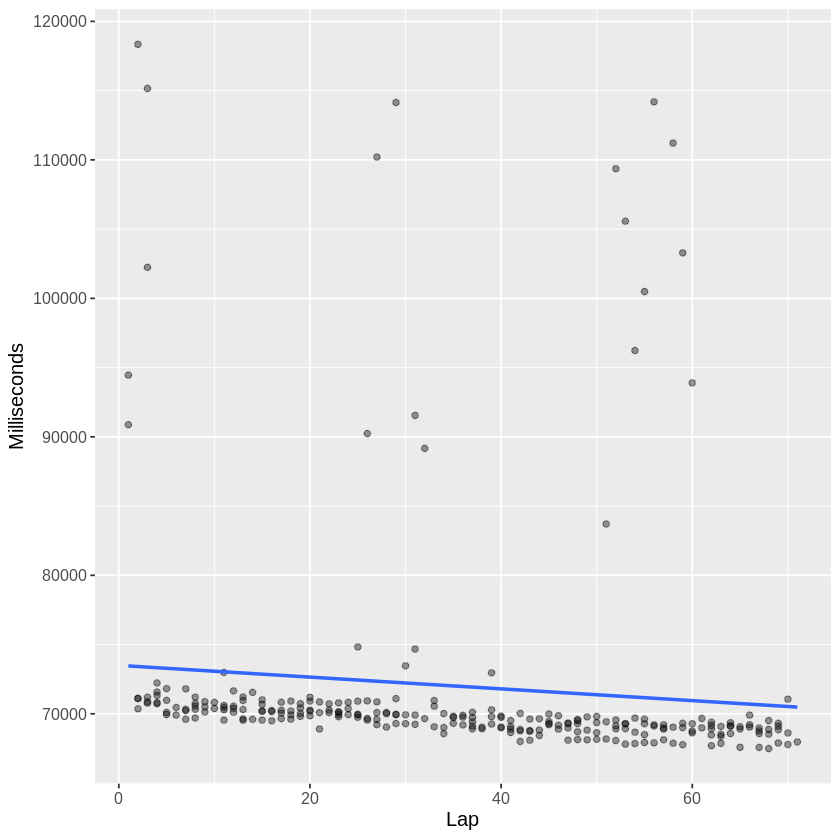

In [15]:
#11.  Austria

ln_austria <- nor_laps %>%
                filter(raceId %in% austria_race_ID) 

ln_austria_clean <- ln_austria %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

ln_austria_clean_ID <- ln_austria_clean %>%
                        pull(raceId)


### SPLITTING DATA

ln_austria_races <- nor_laps %>%
                    filter(raceId %in% ln_austria_clean_ID)

formulaone_split <- initial_split(ln_austria_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 11

initiate_rmse() 

### GETS PREDICTION

get_austria_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1059,53
1017,52


`geom_smooth()` using formula 'y ~ x'



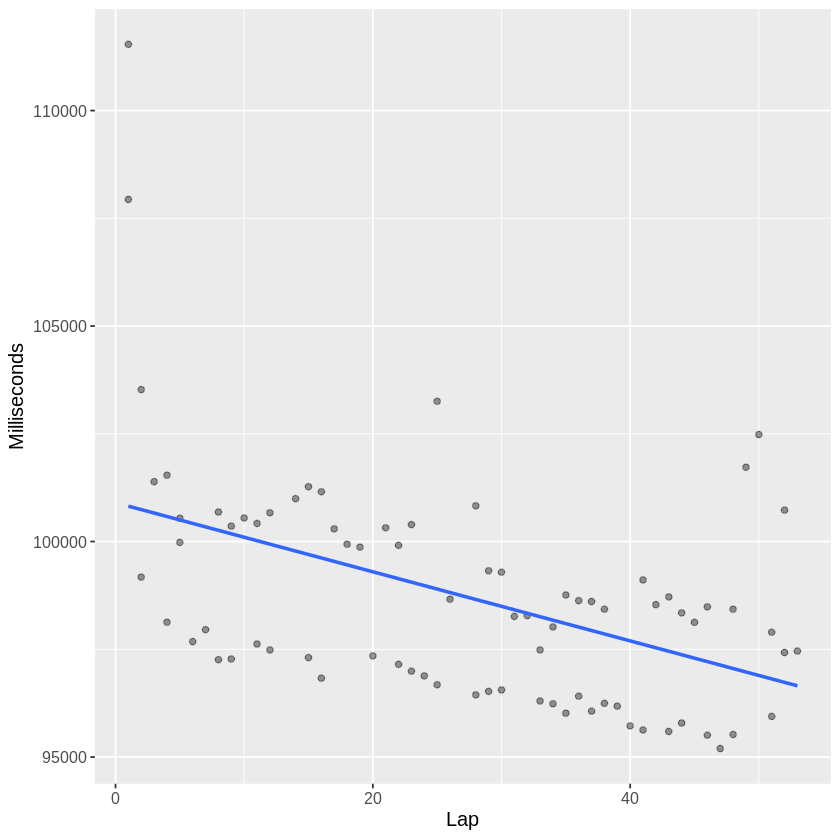

In [16]:
#12. France

ln_france <- nor_laps %>%
                filter(raceId %in% france_race_ID) 

ln_france_clean <- ln_france %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ln_france_clean
ln_france_clean_ID <- ln_france_clean %>%
                        pull(raceId)


### SPLITTING DATA

ln_france_races <- nor_laps %>%
                    filter(raceId %in% ln_france_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(ln_france_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 12

initiate_rmse() 

### GETS PREDICTION

get_france_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



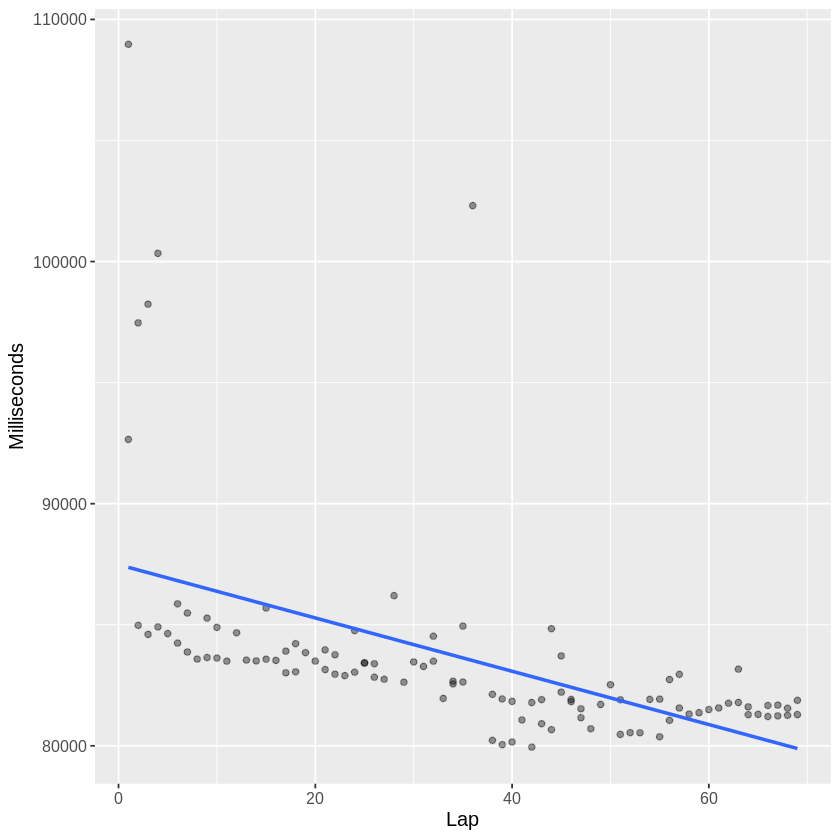

In [17]:
#13.  Hungary

ln_hungary <- nor_laps %>%
                filter(raceId %in% hungary_race_ID) 

ln_hungary_clean <- ln_hungary %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
                     

ln_hungary_clean_ID <- ln_hungary_clean %>%
                        pull(raceId)


### SPLITTING DATA

ln_hungary_races <- nor_laps %>%
                    filter(raceId %in% ln_hungary_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(ln_hungary_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 13

initiate_rmse() 

### GETS PREDICTION

get_hungary_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1037,44
1022,43
1063,1


`geom_smooth()` using formula 'y ~ x'



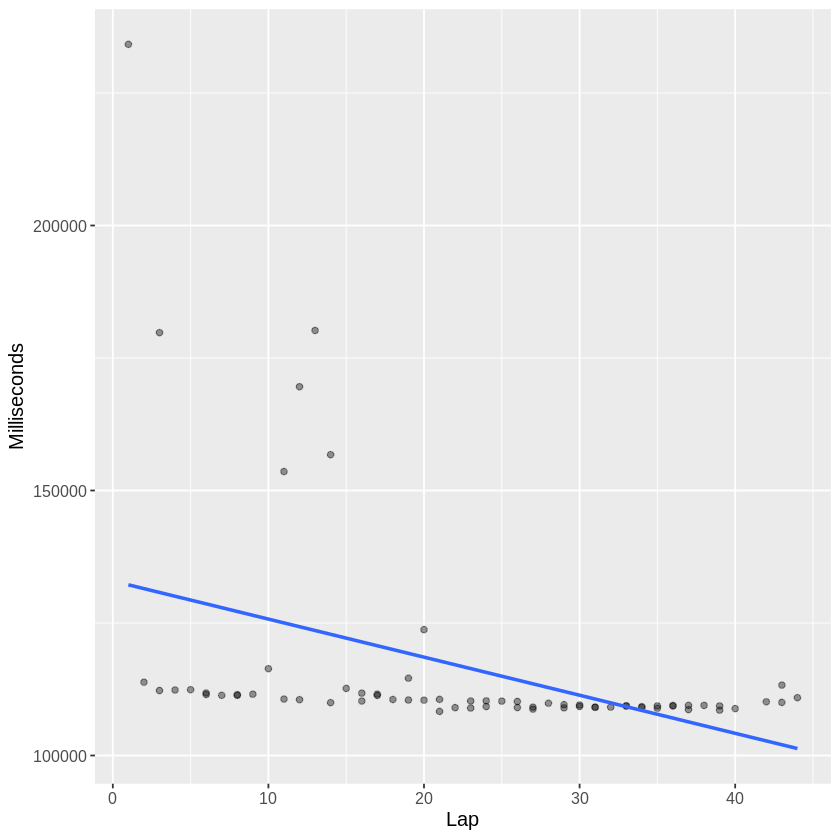

In [18]:
#14.  Belgium

ln_belgium <- nor_laps %>%
                filter(raceId %in% belgium_race_ID) 

ln_belgium_clean <- ln_belgium %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ln_belgium_clean
ln_belgium_clean_ID <- ln_belgium_clean %>%
                        pull(raceId)


### SPLITTING DATA

ln_belgium_races <- nor_laps %>%
                    filter(raceId %in% ln_belgium_clean_ID)

formulaone_split <- initial_split(ln_belgium_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 14

initiate_rmse() 

### GETS PREDICTION

get_belgium_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1064,71


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



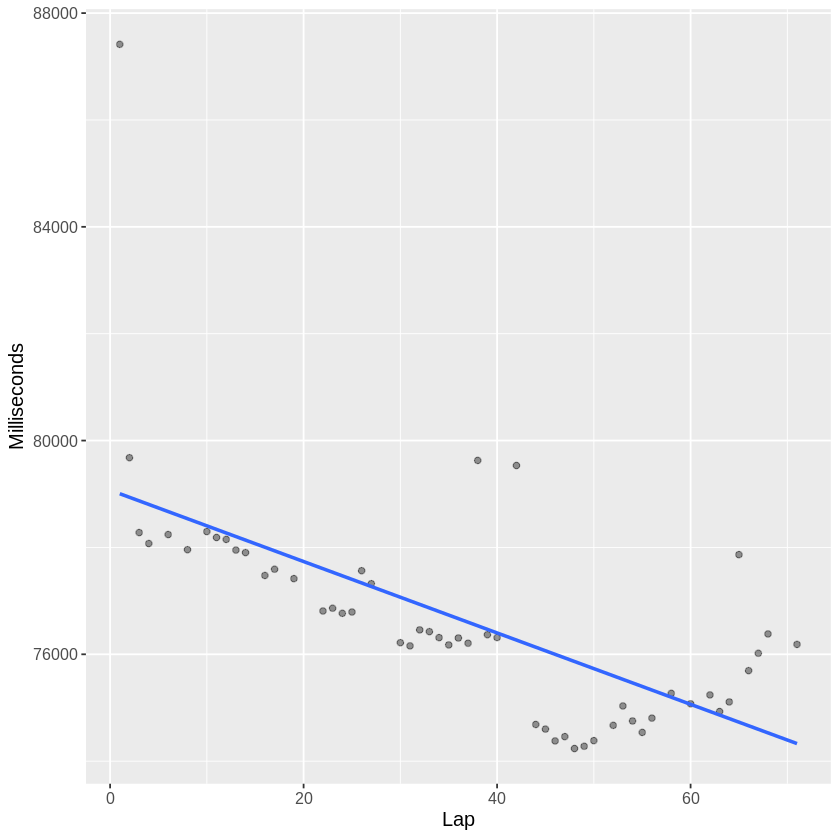

In [19]:
#15.  Netherlands

ln_netherlands <- nor_laps %>%
                filter(raceId %in% netherlands_race_ID) 

ln_netherlands_clean <- ln_netherlands %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ln_netherlands_clean
ln_netherlands_clean_ID <- ln_netherlands_clean %>%
                        pull(raceId)


### SPLITTING DATA

ln_netherlands_races <- nor_laps %>%
                    filter(raceId %in% ln_netherlands_clean_ID)

formulaone_split <- initial_split(ln_netherlands_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 15

initiate_rmse() 

### GETS PREDICTION

get_netherlands_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1038,53
1065,53
1023,52


`geom_smooth()` using formula 'y ~ x'



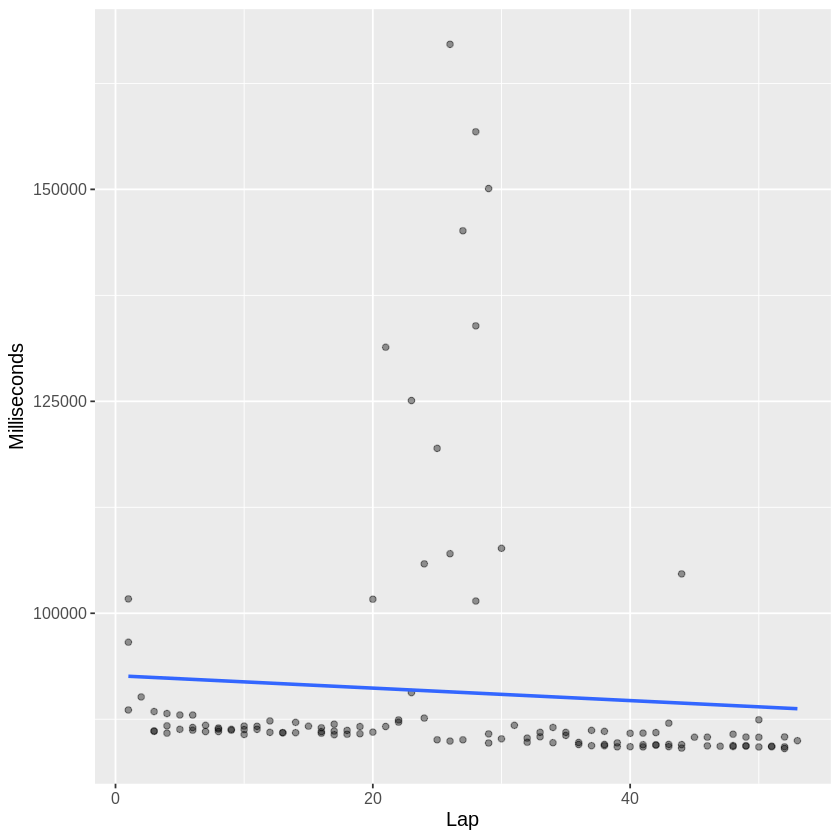

In [20]:
#16.  Italy, Monza

ln_monza <- nor_laps %>%
                filter(raceId %in% monza_race_ID) 

ln_monza_clean <- ln_monza %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))
ln_monza_clean
ln_monza_clean_ID <- ln_monza_clean %>%
                        pull(raceId)


### SPLITTING DATA

ln_monza_races <- nor_laps %>%
                    filter(raceId %in% ln_monza_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(ln_monza_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 16

initiate_rmse() 

### GETS PREDICTION

get_monza_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



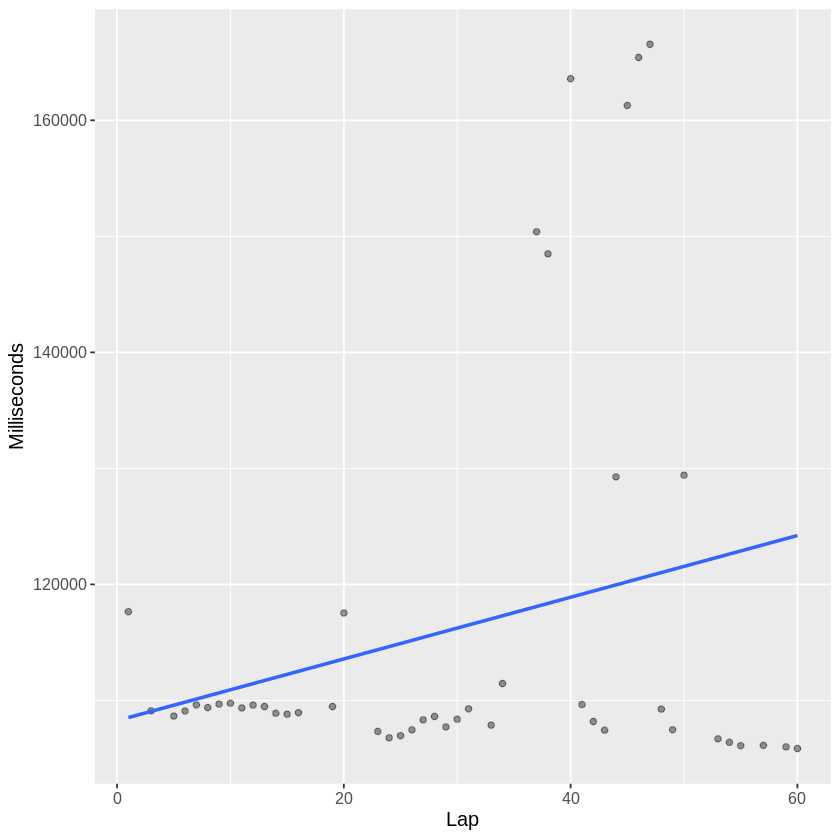

In [21]:
#17.  Singapore

ln_singapore <- nor_laps %>%
                filter(raceId %in% singapore_race_ID) 

ln_singapore_clean <- ln_singapore %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

ln_singapore_clean_ID <- ln_singapore_clean %>%
                        pull(raceId)


### SPLITTING DATA

ln_singapore_races <- nor_laps %>%
                    filter(raceId %in% ln_singapore_clean_ID)

formulaone_split <- initial_split(ln_singapore_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 17

initiate_rmse() 

### GETS PREDICTION

get_singapore_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



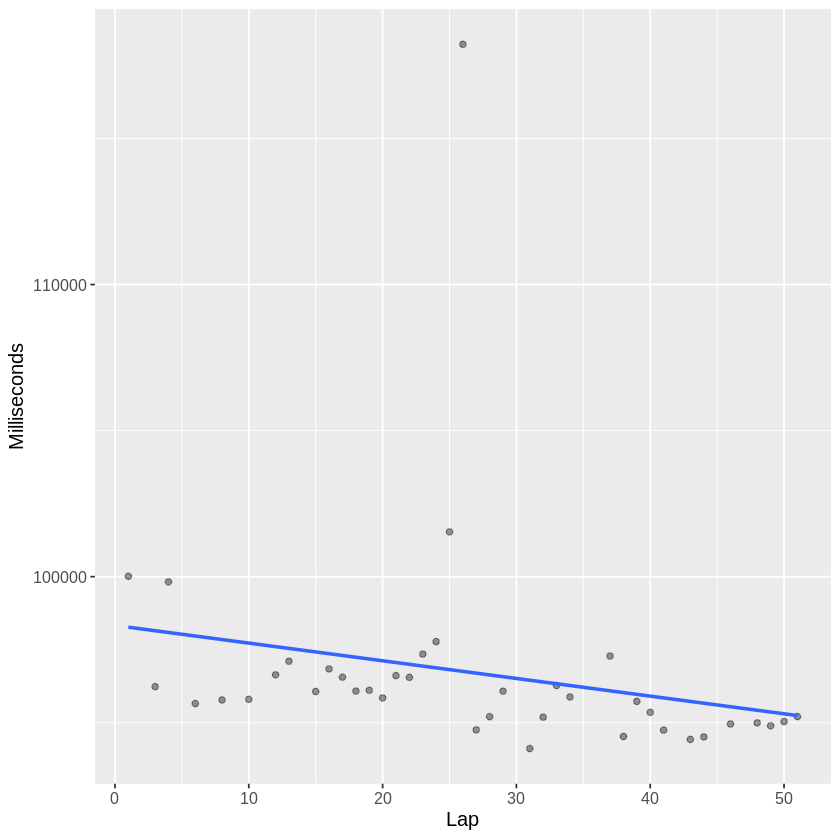

In [22]:
#18.  Japan

ln_japan <- nor_laps %>%
                filter(raceId %in% japan_race_ID) 

ln_japan_clean <- ln_japan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ln_japan_clean_ID <- ln_japan_clean %>%
                        pull(raceId)


### SPLITTING DATA

ln_japan_races <- nor_laps %>%
                    filter(raceId %in% ln_japan_clean_ID)

formulaone_split <- initial_split(ln_japan_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 18

initiate_rmse() 

### GETS PREDICTION

get_japan_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



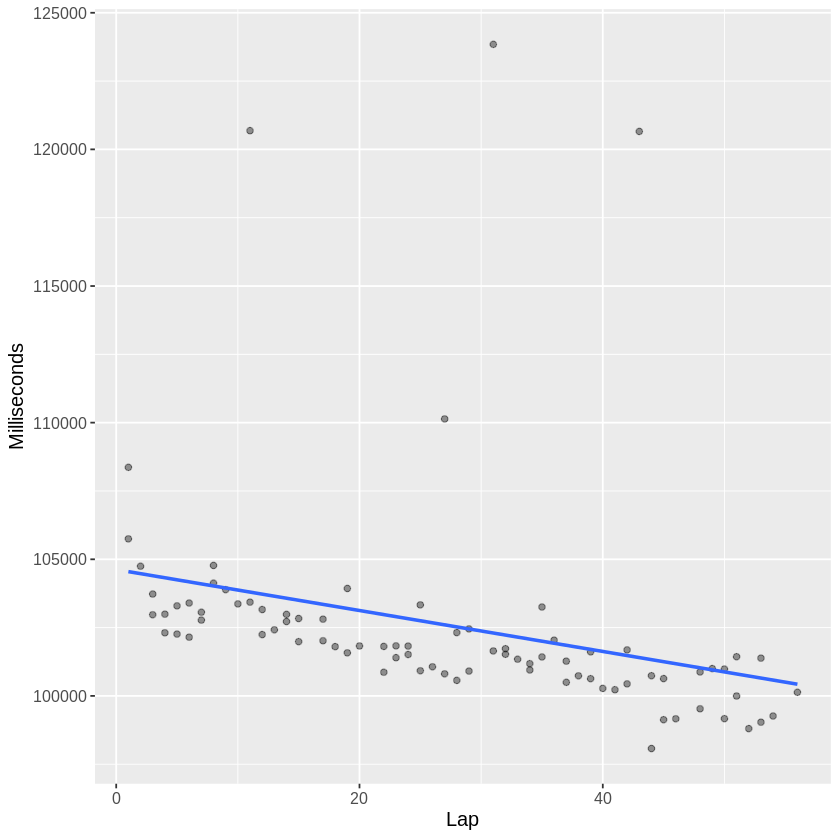

In [23]:
#19.  USA, Austin

ln_austin <- nor_laps %>%
                filter(raceId %in% austin_race_ID) 

ln_austin_clean <- ln_austin %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

ln_austin_clean_ID <- ln_austin_clean %>%
                        pull(raceId)


### SPLITTING DATA

ln_austin_races <- nor_laps %>%
                    filter(raceId %in% ln_austin_clean_ID)

formulaone_split <- initial_split(ln_austin_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 19

initiate_rmse() 

### GETS PREDICTION

get_austin_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



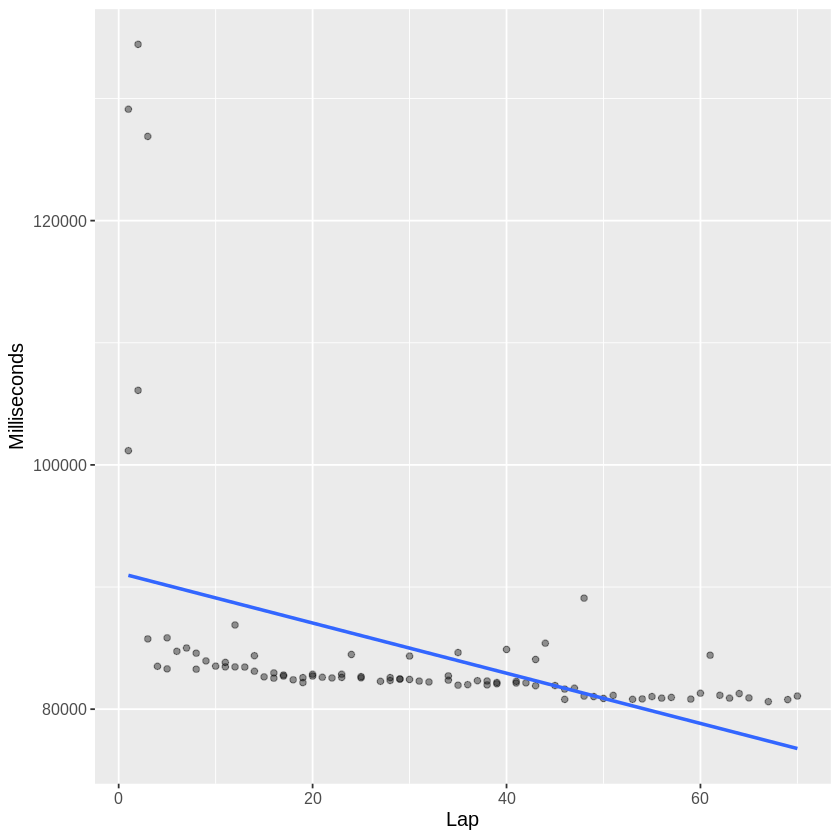

In [24]:
#20.  Mexico

ln_mexico <- nor_laps %>%
                filter(raceId %in% mexico_race_ID) 

ln_mexico_clean <- ln_mexico %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

ln_mexico_clean_ID <- ln_mexico_clean %>%
                        pull(raceId)


### SPLITTING DATA

ln_mexico_races <- nor_laps %>%
                    filter(raceId %in% ln_mexico_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(ln_mexico_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 20

initiate_rmse() 

### GETS PREDICTION

get_mexico_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



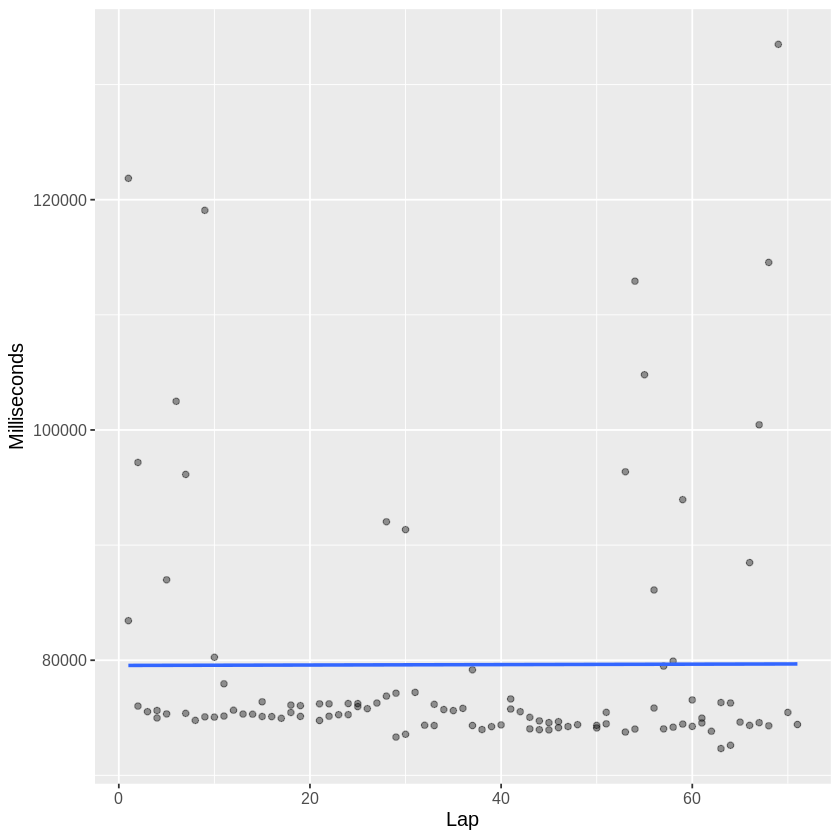

In [25]:
#21.  Brazil

ln_brazil <- nor_laps %>%
                filter(raceId %in% brazil_race_ID) 

ln_brazil_clean <- ln_brazil %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

ln_brazil_clean_ID <- ln_brazil_clean %>%
                        pull(raceId)


### SPLITTING DATA

ln_brazil_races <- nor_laps %>%
                    filter(raceId %in% ln_brazil_clean_ID)

formulaone_split <- initial_split(ln_brazil_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 21

initiate_rmse() 

### GETS PREDICTION

get_brazil_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1047,55
1030,54


`geom_smooth()` using formula 'y ~ x'



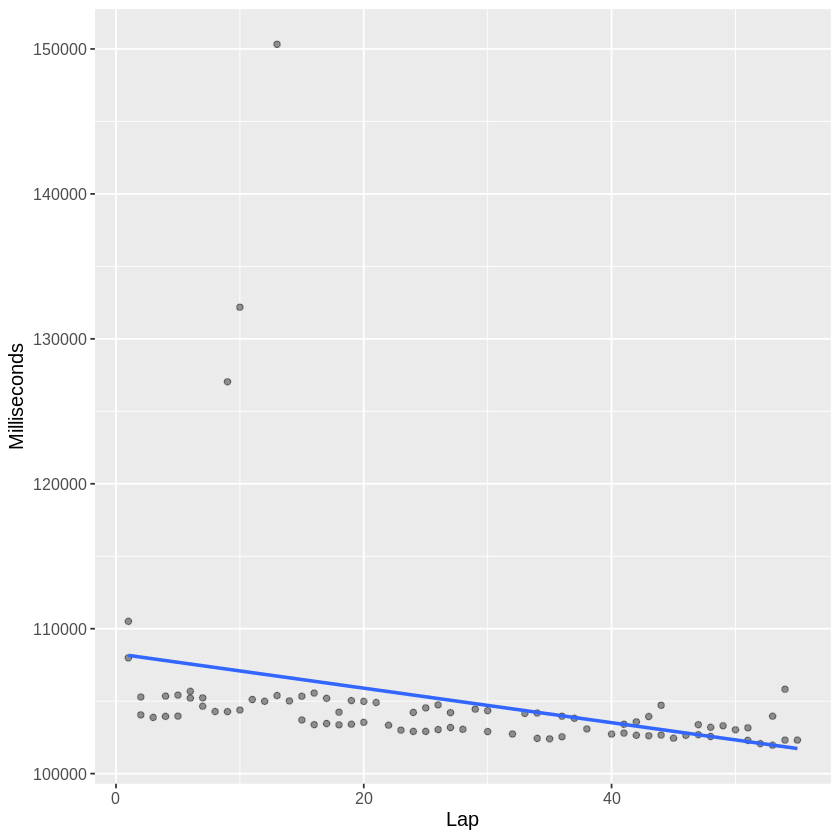

In [26]:
#22.  Abu Dhabi

ln_uae <- nor_laps %>%
                filter(raceId %in% uae_race_ID) 

ln_uae_clean <- ln_uae %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ln_uae_clean
ln_uae_clean_ID <- ln_uae_clean %>%
                        pull(raceId)


### SPLITTING DATA

ln_uae_races <- nor_laps %>%
                    filter(raceId %in% ln_uae_clean_ID)

formulaone_split <- initial_split(ln_uae_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 22

initiate_rmse() 

### GETS PREDICTION

get_uae_prediction()

## Collection

In [27]:
rmse_col
racetime_col

#write_csv(rmse_col, "ln_rmse.csv")

.metric,.estimator,.estimate,Round
<chr>,<chr>,<dbl>,<dbl>
rmse,standard,11733.754,1
rmse,standard,6225.994,2
rmse,standard,1587.149,3
rmse,standard,14622.160,4
rmse,standard,6577.136,5
rmse,standard,3321.793,6
rmse,standard,3451.876,7
rmse,standard,12358.421,8
rmse,standard,10301.488,9


race_time_milliseconds,race_time_mins,race_time_hrs,Round
<dbl>,<dbl>,<dbl>,<dbl>
5798635,96.64392,1.610732,1
5651708,94.19513,1.569919,2
5268647,87.81078,1.463513,3
5550325,92.50541,1.541757,4
5766529,96.10882,1.601814,5
5645322,94.08870,1.568145,6
6128304,102.13841,1.702307,7
5789540,96.49233,1.608206,8
5643464,94.05773,1.567629,9
